<a href="https://colab.research.google.com/github/oburckard/MyRepo/blob/master/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f(x) = x^3

f'(x) = 3*x^2

x0 = 1

h = 0.01

f'(x=1) = ((1+0.01)^3) -1) / 0.01 = 3.0301

f'(x=1) = ((1+1)^3) -1) / 1 = 7

f'(x=1) = 3

It's more precise if h is small.

f''(x=1) = ((3*(1+0.01)^2)-3*1^2)/0.01 = 6.03

f''(x=1) = ((3*(1+1)^2)-3*1^2)/1 = 9

f''(x=1) = 6

In [0]:
##Differentiation - calculating the first derivative and the higher order derivatives

import numpy as np

# Define the finite step
h = 0.01

# Define method
method = 'central'

# Set range for plotting
x_min = -2
x_max =  8

# Define function
def f(x):
    #return 1+(1/2)*np.tanh(x)
    return np.cos(x)

def g_1(x):
  return -np.sin(x)

def g_2(x):
  return -np.cos(x)

def g_3(x):
  return np.sin(x)

In [0]:
# First derivative
def first_c(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


In [0]:
# Second derivative
def second_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (first_c(f,a + h,method,h) - first_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (first_c(f,a + h,method,h) - first_c(f,a,method,h))/h
    elif method == 'backward':
        return (first_c(f,a,method,h) - first_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [0]:
# Third derivative
def third_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (second_c(f,a + h,method,h) - second_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (second_c(f,a + h,method,h) - second_c(f,a,method,h))/h
    elif method == 'backward':
        return (second_c(f,a,method,h) - second_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [63]:
##Print the function and it's derivatives

print("Using central difference: \n")
print("     x       function     first_c      secind_c              third_c")

for x in range(x_min,x_max):
    print(x, f(x), first_c(f,x,method,h), second_c(f,x,method,h), third_c(f,x,method,h))

Using central difference: 

     x       function     first_c      secind_c              third_c
-2 -0.4161468365471424 0.9092822719443339 0.41613296517140075 -0.9092519629577689
-1 0.5403023058681398 0.8414569603616029 -0.5402842960317011 -0.8414289121433383
0 1.0 0.0 -0.9999666671112184 0.0
1 0.5403023058681398 -0.8414569603616029 -0.5402842960317011 0.8414289121433383
2 -0.4161468365471424 -0.9092822719443339 0.41613296517140075 0.9092519629577689
3 -0.9899924966004454 -0.1411176560714933 0.9899594972900827 0.14111295223995235
4 -0.6536436208636119 0.7567898819960617 0.6536218330335797 -0.7567646560374675
5 0.28366218546322625 0.958908292671784 -0.2836527301829095 -0.9588763294834934
6 0.960170286650366 0.27941084129723404 -0.9601382814006243 -0.2794015277196582
7 0.7539022543433046 -0.656975648996877 -0.753877124602953 0.6569537500944467


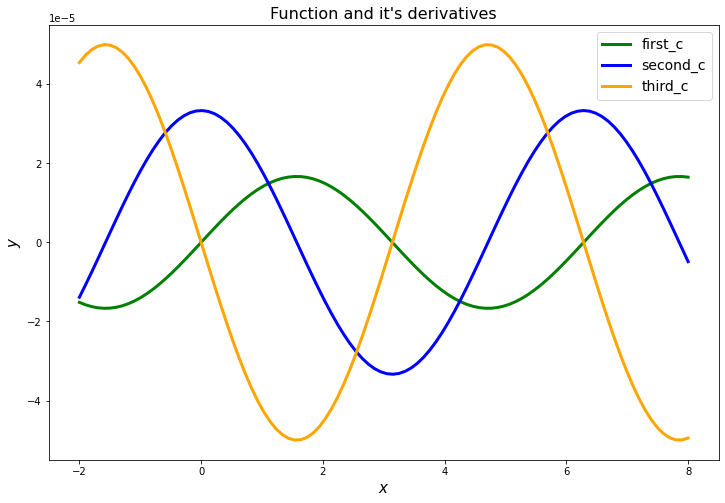

In [64]:
## Plot the function and it's derivatives
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.title("Function and it's derivatives",fontsize=16) 

xlin = np.linspace(x_min, x_max, num=100)
#plt.plot(xlin,f(xlin),linewidth=3,color='red',linestyle='solid', label="function")
#plt.plot(xlin,first_c(f,xlin,method,h),linewidth=3,color='green',linestyle='solid', label="first_c")
#plt.plot(xlin,second_c(f,xlin,method,h),linewidth=3,color='blue',linestyle='solid', label="second_c")
#plt.plot(xlin,third_c(f,xlin,method,h),linewidth=3,color='orange',linestyle='solid', label="third_c")

plt.plot(xlin,first_c(f,xlin,method,h)-g_1(xlin),linewidth=3,color='green',linestyle='solid', label="first_c")
plt.plot(xlin,second_c(f,xlin,method,h)-g_2(xlin),linewidth=3,color='blue',linestyle='solid', label="second_c")
plt.plot(xlin,third_c(f,xlin,method,h)-g_3(xlin),linewidth=3,color='orange',linestyle='solid', label="third_c")


plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

    
plt.show()



If the step is h=1 it's less accurate than if the step is h=0.0001. The amplitude is bigger.